In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_sf=pd.read_csv("sanfrancisco_incidents_summer_2014.csv")
data_sf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


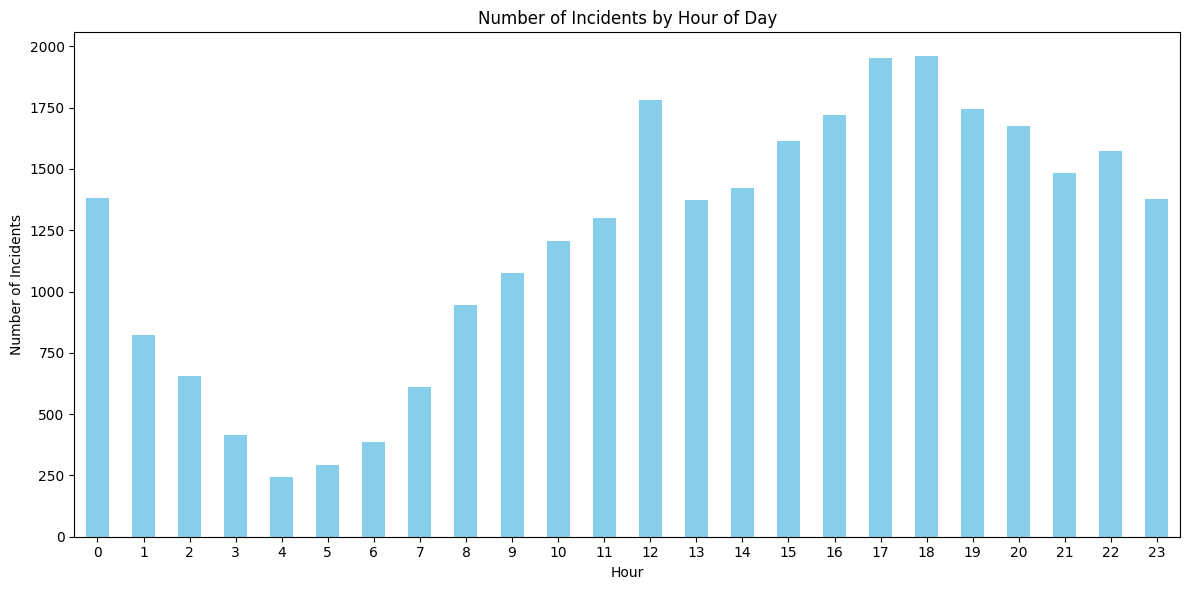

In [5]:

# 1. Incidents by time of day (e.g., how many incidents occur at each hour of the day)
#Here we can see that in the morning are less incident in the day, in the afternoon are more than the double that in the morning

data_sf['Hour'] = data_sf['Time'].apply(lambda x: int(x.split(':')[0]))
incidents_by_hour = data_sf.groupby('Hour').size()

plt.figure(figsize=(12, 6))
incidents_by_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


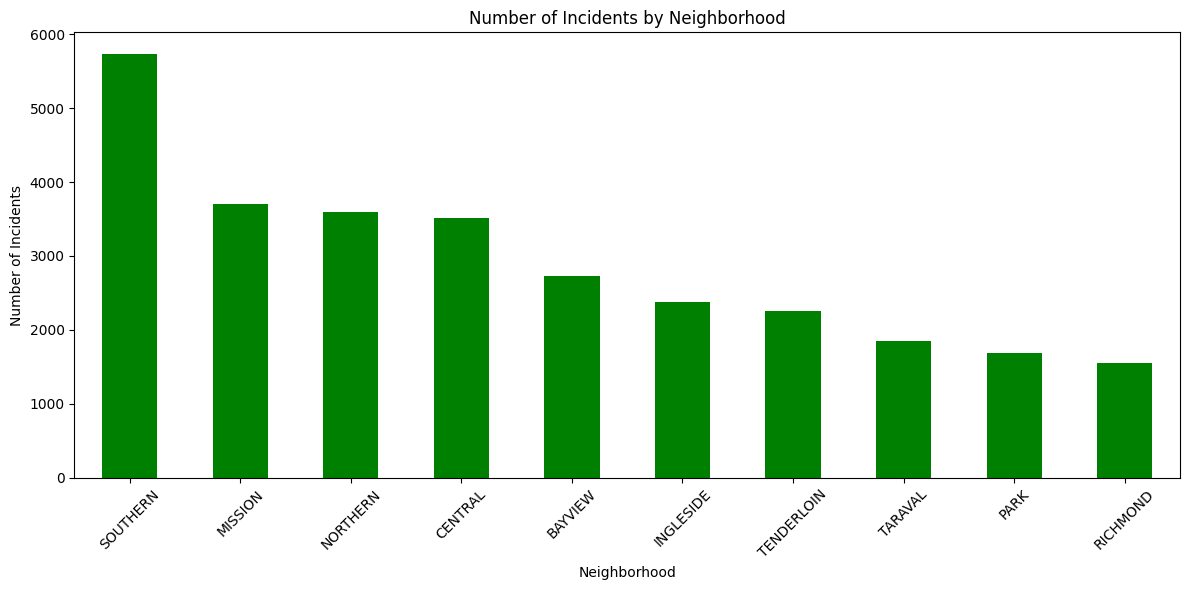

In [6]:
# 2. Incidents by neighborhood (e.g., which neighborhood has the most incidents)
#Here we can see the most dangerous Neighborhood of the city, in taht way the authorities can know where take an action in order to improve the number of incident in the city.

incidents_by_district = data_sf['PdDistrict'].value_counts()

plt.figure(figsize=(12, 6))
incidents_by_district.plot(kind='bar', color='green')
plt.title('Number of Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

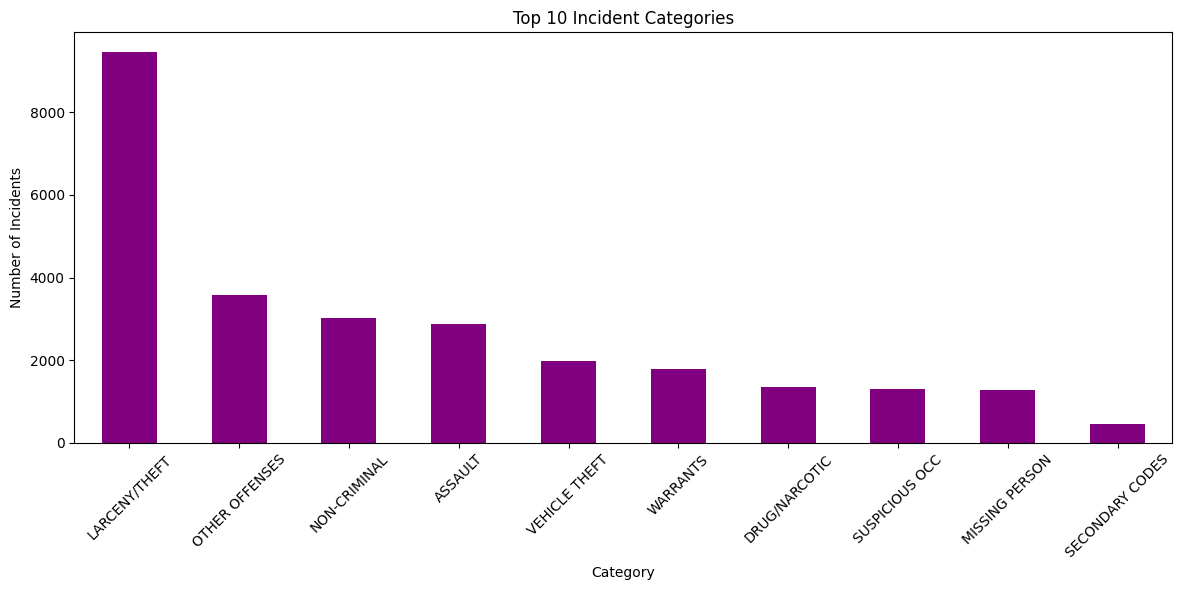

In [7]:
# Additional visualization: Incidents by Category
#Here we can see the top of incidents in the city by category and also how much of them occur

top_categories = data_sf['Category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='purple')
plt.title('Top 10 Incident Categories')
plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

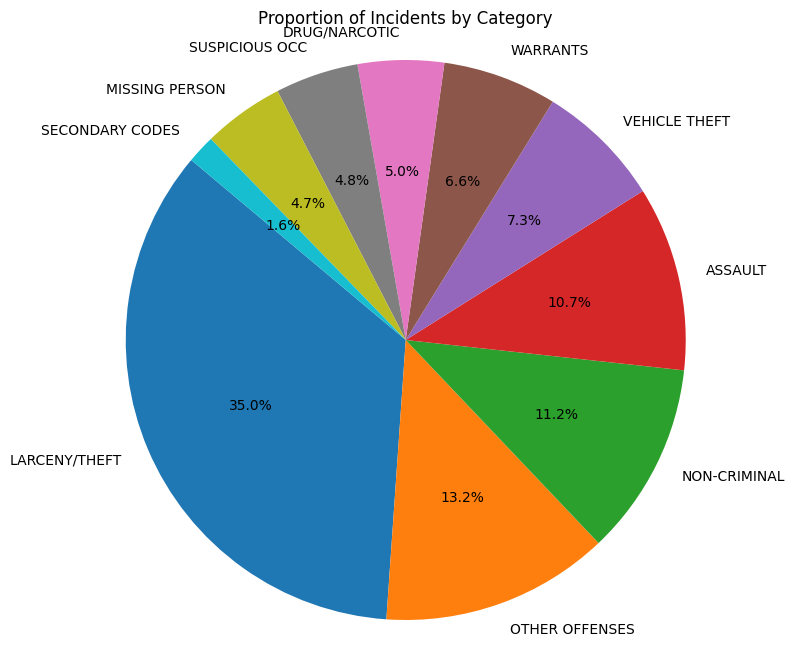

In [11]:
#In addition to the last graph we can see at high level the percentege of incident, in this way we can try to decrease the most communt of then in order to decrease the overall number of incidents

category_counts = data_sf['Category'].value_counts(normalize=True).head(10) * 100  

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Proportion of Incidents by Category')
plt.show()

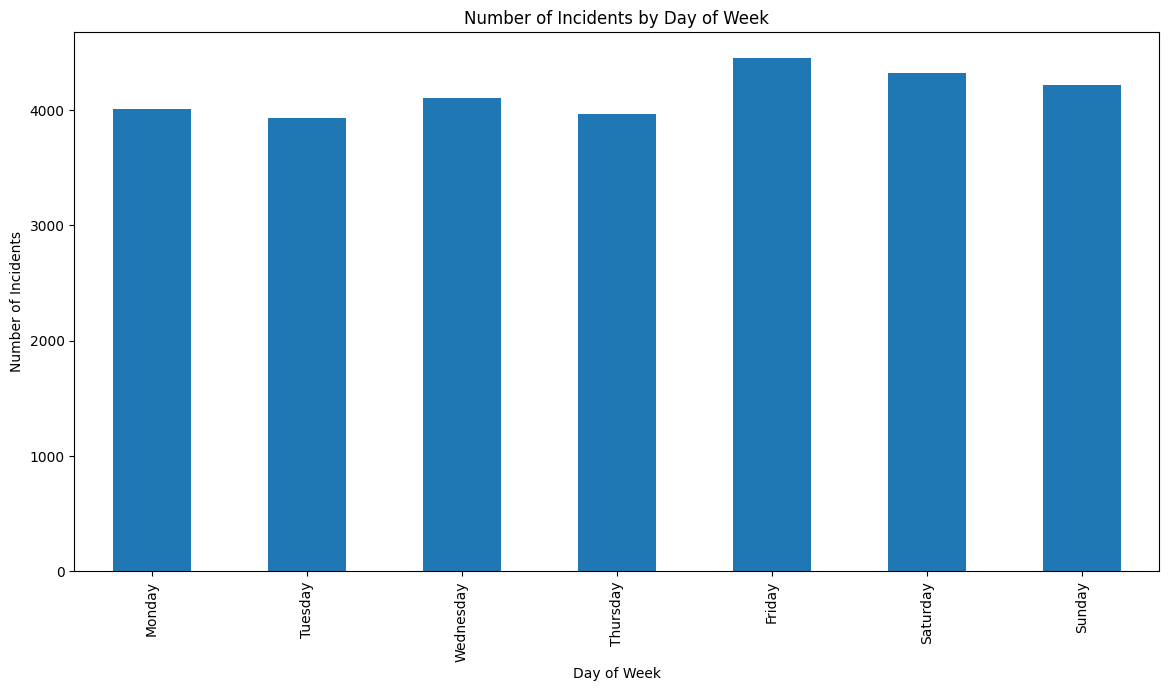

In [9]:
#Also we can see here that there is not a relation of the number of incident by the day of the week

day_of_week_counts = data_sf['DayOfWeek'].value_counts()
day_of_week_counts = day_of_week_counts[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']] 
day_of_week_counts.plot(kind='bar', figsize=(14, 7))
plt.title('Number of Incidents by Day of Week')
plt.ylabel('Number of Incidents')
plt.xlabel('Day of Week')
plt.show()

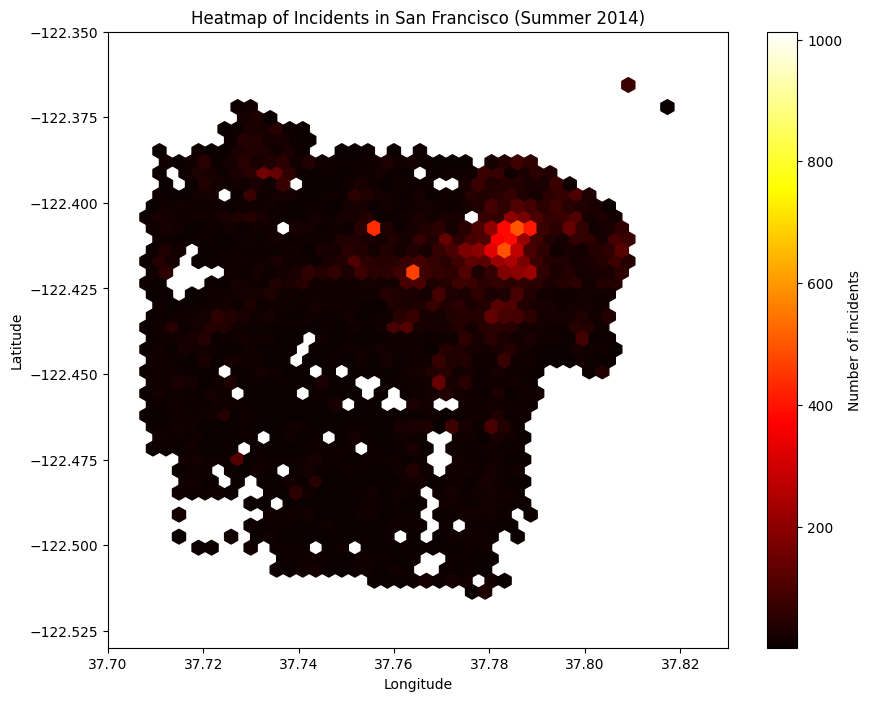

In [45]:
#On the next two plots we can see the distribution of the crimes in the city 

# Plotting the heatmap
plt.figure(figsize=(10, 8))

# Assuming 'Y' is longitude and 'x' is latitude
plt.hexbin(data_sf['Y'], data_sf['X'], gridsize=40, cmap='hot', mincnt=1)
plt.colorbar(label='Number of incidents')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Incidents in San Francisco (Summer 2014)')

plt.xlim(37.70, 37.83)
plt.ylim(-122.53, -122.35)

plt.show()

In [43]:
import folium
from folium.plugins import HeatMap

# Primero, asegúrate de que 'data_sf' tenga las columnas de latitud y longitud correctas.
# Aquí estoy asumiendo que las columnas se llaman 'Latitude' y 'Longitude'.

# Definir la ubicación inicial para centrar el mapa
map_center = data_sf[['Y', 'X']].median().values.tolist()
# map_center = [37.7749, -122.4194]  # Coordenadas aproximadas del centro de San Francisco
map_sf = folium.Map(location=map_center, zoom_start=13)

# Crear el mapa
map_sf = folium.Map(location=map_center, zoom_start=12)

# Añadir el mapa de calor al mapa existente
HeatMap(data_sf[['Y', 'X']], radius=10, blur=7, max_zoom=1,min_opacity=0.2).add_to(map_sf)

# Mostrar el mapa
map_sf

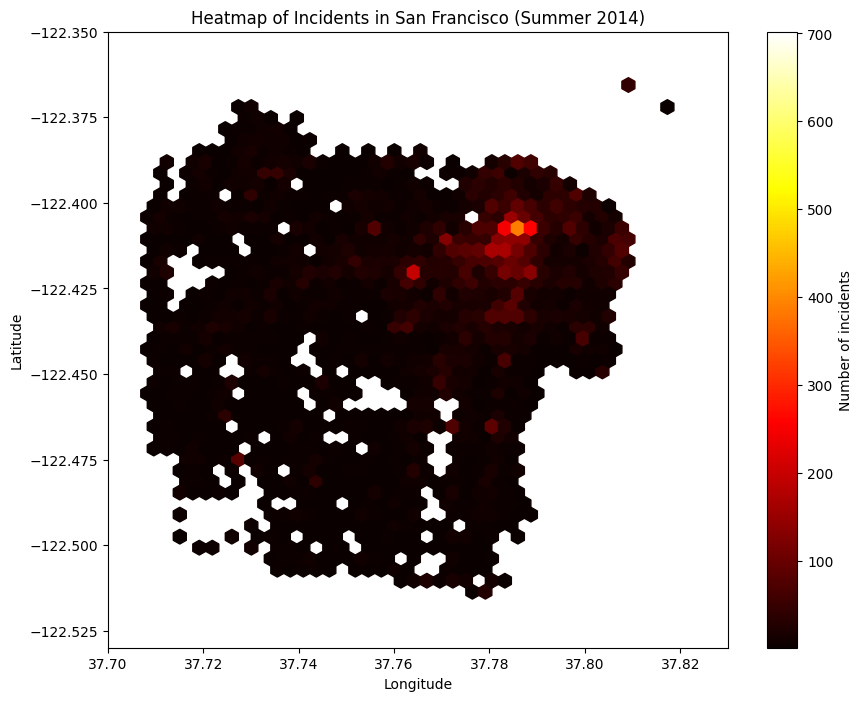

In [49]:
#Based on the top 10 graph of incident we can see if there is a particular place 
#related to the top 3 crimes,HERE IS NOT A BIG CHANGE

data_sftop=data_sf[data_sf["Category"].isin(["LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL"])]
# Plotting the heatmap
plt.figure(figsize=(10, 8))

# Assuming 'Y' is longitude and 'x' is latitude
plt.hexbin(data_sftop['Y'], data_sftop['X'], gridsize=40, cmap='hot', mincnt=1)
plt.colorbar(label='Number of incidents')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Incidents in San Francisco (Summer 2014)')

plt.xlim(37.70, 37.83)
plt.ylim(-122.53, -122.35)

plt.show()